In [184]:
import pandas as pd
df1=pd.read_csv('/workspaces/Power-Consumption-Pattern/NO/All CSV/NO_file1.csv')
df2=pd.read_csv('/workspaces/Power-Consumption-Pattern/NO/All CSV/NO_file2.csv')

In [185]:
#Making it years campatible
df_2021=df1
df_2023=df2[0:5832]
df_2022=df2[5832:8760]
df_2022

,Unnamed: 0,values,date,month,year,hour
5832,5832,4312.0,1,9,2022,0
5833,5833,4356.0,1,9,2022,1
5834,5834,45600.0,1,9,2022,2
5835,5835,4464.0,1,9,2022,3
5836,5836,4572.0,1,9,2022,4
...,...,...,...,...,...,...
8755,8755,10180.0,31,12,2022,19
8756,8756,4484.0,31,12,2022,20
8757,8757,4356.0,31,12,2022,21
8758,8758,4384.0,31,12,2022,22


In [186]:
df_2023[df_2023['month']==3][df_2023['hour']==12]['date'].value_counts()
## 3 month 12 is more and 23 is less..
## 3 month 12 hour and 26 date ka kam karo
## 3 month 23 hour and 26 date ka jyada karo
indexes_to_drop = df_2023[(df_2023['month'] == 3) & (df_2023['hour'] == 12) & (df_2023['date'] == 26)].index.tolist()
df_2023=df_2023.drop(indexes_to_drop[0])
df_2023=df_2023.reset_index()
print(len(df_2023))
new_row = pd.DataFrame([{
    'year': 2023,
    'month': 3,
    'date': 26,
    'hour': 23,
    'values': 6000
}])
df_2023 = pd.concat([df_2023, new_row], ignore_index=True)
print(len(df_2023))
df_2023 = df_2023.sort_values(by=['year', 'month', 'date', 'hour'])
df_2023=df_2023.reset_index()

5831
5832


/tmp/ipykernel_5550/3949843293.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2023[df_2023['month']==3][df_2023['hour']==12]['date'].value_counts()


In [187]:
df_2023[df_2023['month']==3]['hour'].value_counts()

hour
12    31
0     31
22    31
21    31
20    31
19    31
18    31
17    31
16    31
15    31
14    31
13    31
11    31
10    31
9     31
8     31
7     31
6     31
5     31
4     31
3     31
2     31
1     31
23    31
Name: count, dtype: int64

In [188]:
#Extrapolating the 2022 using the 2023 and 2021
df_2022=df_2022.reset_index(drop=True)
df_2022

,Unnamed: 0,values,date,month,year,hour
0,5832,4312.0,1,9,2022,0
1,5833,4356.0,1,9,2022,1
2,5834,45600.0,1,9,2022,2
3,5835,4464.0,1,9,2022,3
4,5836,4572.0,1,9,2022,4
...,...,...,...,...,...,...
2923,8755,10180.0,31,12,2022,19
2924,8756,4484.0,31,12,2022,20
2925,8757,4356.0,31,12,2022,21
2926,8758,4384.0,31,12,2022,22


In [189]:
new_rows_data=pd.DataFrame(columns=['hour','date','year','values'])
for i in range (0,5832):
  df_2022.loc[2928+i,'hour']=df_2023.iloc[i]['hour']
  df_2022.loc[2928+i,'date']=df_2023.iloc[i]['date']
  df_2022.loc[2928+i,'year']=2022
  df_2022.loc[2928+i,'month']=df_2023.iloc[i]['month']
  df_2022.loc[2928+i,'values']=(((float(df_2023.iloc[i]['values']))+float(df_2021.iloc[i]['values']))/2)
df_2022.sort_values(by=['month','date','hour'], inplace=True)
df_2022=df_2022.reset_index(drop=True)
df_2022

,Unnamed: 0,values,date,month,year,hour
0,NaN,3503.0,1.0,1.0,2022.0,0.0
1,NaN,3984.0,1.0,1.0,2022.0,1.0
2,NaN,3019.0,1.0,1.0,2022.0,2.0
3,NaN,4721.0,1.0,1.0,2022.0,3.0
4,NaN,3120.0,1.0,1.0,2022.0,4.0
...,...,...,...,...,...,...
8755,8755.0,10180.0,31.0,12.0,2022.0,19.0
8756,8756.0,4484.0,31.0,12.0,2022.0,20.0
8757,8757.0,4356.0,31.0,12.0,2022.0,21.0
8758,8758.0,4384.0,31.0,12.0,2022.0,22.0


In [190]:
df_2022[df_2022['month']==12]['hour'].value_counts()

hour
0.0     31
1.0     31
22.0    31
21.0    31
20.0    31
19.0    31
18.0    31
17.0    31
16.0    31
15.0    31
14.0    31
13.0    31
12.0    31
11.0    31
10.0    31
9.0     31
8.0     31
7.0     31
6.0     31
5.0     31
4.0     31
3.0     31
2.0     31
23.0    31
Name: count, dtype: int64

In [191]:
df_2022

,Unnamed: 0,values,date,month,year,hour
0,NaN,3503.0,1.0,1.0,2022.0,0.0
1,NaN,3984.0,1.0,1.0,2022.0,1.0
2,NaN,3019.0,1.0,1.0,2022.0,2.0
3,NaN,4721.0,1.0,1.0,2022.0,3.0
4,NaN,3120.0,1.0,1.0,2022.0,4.0
...,...,...,...,...,...,...
8755,8755.0,10180.0,31.0,12.0,2022.0,19.0
8756,8756.0,4484.0,31.0,12.0,2022.0,20.0
8757,8757.0,4356.0,31.0,12.0,2022.0,21.0
8758,8758.0,4384.0,31.0,12.0,2022.0,22.0


In [192]:
df_2023[df_2023['month']==3]['hour'].value_counts()

hour
12    31
0     31
22    31
21    31
20    31
19    31
18    31
17    31
16    31
15    31
14    31
13    31
11    31
10    31
9     31
8     31
7     31
6     31
5     31
4     31
3     31
2     31
1     31
23    31
Name: count, dtype: int64

In [193]:
#Extrapolating the 2023 using the 2022 and 2021
new_rows_data=[]
for i in range (5832,8760):
  df_2023.loc[i,'hour']=df_2022.iloc[i]['hour']
  df_2023.loc[i,'date']=df_2022.iloc[i]['date']
  df_2023.loc[i,'year']=2023
  df_2023.loc[i,'month']=df_2022.iloc[i]['month']
  df_2023.loc[i,'values']=(2*float(df_2022.iloc[i]['values']))-float(df_2021.iloc[i]['values'])
  # new_row_data={'hour':df_2022.iloc[i]['hour'],'date':df_2022.iloc[i]['date'],'year':2023,'month':df_2022.iloc[i]['month'],'values':(2*float(df_2022.iloc[i]['values']))-float(df_2021.iloc[i]['values'])}
  # new_rows_data.append(new_row_data)
# df_2023=df_2023.append(new_rows_data,ignore_index=True)
df_2023.sort_values(by=['month','date','hour'], inplace=True)
df_2023=df_2023.reset_index(drop=True)
df_2023

,level_0,index,Unnamed: 0,values,date,month,year,hour
0,0.0,0.0,0.0,4428.0,1.0,1.0,2023.0,0.0
1,1.0,1.0,1.0,4220.0,1.0,1.0,2023.0,1.0
2,2.0,2.0,2.0,4084.0,1.0,1.0,2023.0,2.0
3,3.0,3.0,3.0,6180.0,1.0,1.0,2023.0,3.0
4,4.0,4.0,4.0,4300.0,1.0,1.0,2023.0,4.0
...,...,...,...,...,...,...,...,...
8755,NaN,NaN,NaN,12474.0,31.0,12.0,2023.0,19.0
8756,NaN,NaN,NaN,7054.0,31.0,12.0,2023.0,20.0
8757,NaN,NaN,NaN,5694.0,31.0,12.0,2023.0,21.0
8758,NaN,NaN,NaN,6822.0,31.0,12.0,2023.0,22.0


In [194]:
#Extrapolating the 2020,2019,2018 using 2021,2022,2023
import pandas as pd

# Create empty DataFrames for years 2020, 2019, and 2018
df_2020 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2018 = pd.DataFrame()

# Loop through the range of indices
for i in range(0, 8760):
    # Calculate values for the respective years
    values_2020 = ((2 * float(df_2021.iloc[i]['values'])) - (float(df_2022.iloc[i]['values'])))
    values_2019 = ((2 * values_2020) - (float(df_2021.iloc[i]['values'])))
    values_2018 = ((2 * values_2019) - (values_2020))


    df_2020.loc[i,'hour']=df_2021.iloc[i]['hour']
    df_2020.loc[i,'month']=df_2021.iloc[i]['month']
    df_2020.loc[i,'date']=df_2021.iloc[i]['date']
    df_2020.loc[i,'year']=2020
    df_2020.loc[i,'values']=values_2020


    df_2019.loc[i,'hour']=df_2020.iloc[i]['hour']
    df_2019.loc[i,'month']=df_2020.iloc[i]['month']
    df_2019.loc[i,'date']=df_2020.iloc[i]['date']
    df_2019.loc[i,'year']=2019
    df_2019.loc[i,'values']=values_2019

    df_2018.loc[i,'hour']=df_2020.iloc[i]['hour']
    df_2018.loc[i,'month']=df_2020.iloc[i]['month']
    df_2018.loc[i,'date']=df_2020.iloc[i]['date']
    df_2018.loc[i,'year']=2018
    df_2018.loc[i,'values']=values_2018

print("DataFrame for 2023:")
print(df_2023)
print("DataFrame for 2022:")
print(df_2022)
print("DataFrame for 2021:")
print(df_2021)
print("DataFrame for 2020:")
print(df_2020)
print("\nDataFrame for 2019:")
print(df_2019)
print("\nDataFrame for 2018:")
print(df_2018)
df_2023.to_csv('NO_2023.csv')
df_2022.to_csv('NO_2022.csv')
df_2021.to_csv('NO_2021.csv')
df_2020.to_csv('NO_2020.csv')
df_2019.to_csv('NO_2019.csv')
df_2018.to_csv('NO_2018.csv')

DataFrame for 2023:
      level_0  index  Unnamed: 0   values  date  month    year  hour
0         0.0    0.0         0.0   4428.0   1.0    1.0  2023.0   0.0
1         1.0    1.0         1.0   4220.0   1.0    1.0  2023.0   1.0
2         2.0    2.0         2.0   4084.0   1.0    1.0  2023.0   2.0
3         3.0    3.0         3.0   6180.0   1.0    1.0  2023.0   3.0
4         4.0    4.0         4.0   4300.0   1.0    1.0  2023.0   4.0
...       ...    ...         ...      ...   ...    ...     ...   ...
8755      NaN    NaN         NaN  12474.0  31.0   12.0  2023.0  19.0
8756      NaN    NaN         NaN   7054.0  31.0   12.0  2023.0  20.0
8757      NaN    NaN         NaN   5694.0  31.0   12.0  2023.0  21.0
8758      NaN    NaN         NaN   6822.0  31.0   12.0  2023.0  22.0
8759      NaN    NaN         NaN  10520.0  31.0   12.0  2023.0  23.0

[8760 rows x 8 columns]
DataFrame for 2022:
      Unnamed: 0   values  date  month    year  hour
0            NaN   3503.0   1.0    1.0  2022.0   0.0
1

In [195]:
#Table for the NO (6* 8760)
import pandas as pd
mixed_df=pd.DataFrame()
mixed_df['date']=df_2023['date']
mixed_df['month']=df_2023['month']
mixed_df['hour']=df_2023['hour']
mixed_df['values_2023']=(df_2023['values']/1000).astype(float).round(2)
mixed_df['values_2022']=(df_2022['values']/1000).astype(float).round(2)
mixed_df['values_2021']=(df_2021['values']/1000).astype(float).round(2)
mixed_df['values_2020']=(df_2020['values']/1000).astype(float).round(2)
mixed_df['values_2019']=(df_2019['values']/1000).astype(float).round(2)
mixed_df['values_2018']=(df_2018['values']/1000).astype(float).round(2)
mixed_df.to_csv('NO_mixed.csv')
mixed_df

,date,month,hour,values_2023,values_2022,values_2021,values_2020,values_2019,values_2018
0,1.0,1.0,0.0,4.43,3.50,3.68,3.86,4.05,4.23
1,1.0,1.0,1.0,4.22,3.98,2.58,1.17,-0.23,-1.64
2,1.0,1.0,2.0,4.08,3.02,3.75,4.48,5.21,5.94
3,1.0,1.0,3.0,6.18,4.72,1.95,-0.81,-3.58,-6.35
4,1.0,1.0,4.0,4.30,3.12,3.26,3.40,3.55,3.69
...,...,...,...,...,...,...,...,...,...
8755,31.0,12.0,19.0,12.47,10.18,7.89,5.59,3.30,1.00
8756,31.0,12.0,20.0,7.05,4.48,1.91,-0.66,-3.23,-5.80
8757,31.0,12.0,21.0,5.69,4.36,3.02,1.68,0.34,-1.00
8758,31.0,12.0,22.0,6.82,4.38,1.95,-0.49,-2.93,-5.37


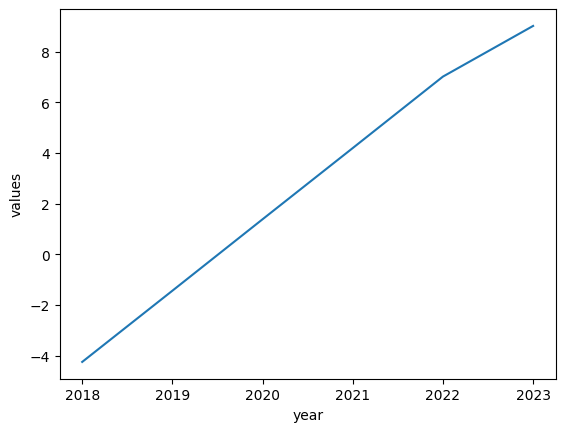

In [196]:
#Random Graph Generator
import matplotlib.pyplot as plt
import random
i=random.randint(0, 8759)
y_values=[mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]]
x_values=[2018,2019,2020,2021,2022,2023]
plt.plot(x_values,y_values)
plt.xlabel('year')
plt.ylabel('values')
plt.show()

In [197]:
mixed_df[mixed_df['month']==12]['hour'].value_counts()

hour
0.0     31
1.0     31
22.0    31
21.0    31
20.0    31
19.0    31
18.0    31
17.0    31
16.0    31
15.0    31
14.0    31
13.0    31
12.0    31
11.0    31
10.0    31
9.0     31
8.0     31
7.0     31
6.0     31
5.0     31
4.0     31
3.0     31
2.0     31
23.0    31
Name: count, dtype: int64